# Connor Bruce Project 2

## Import Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Importing Relevant Data

### Data Information
The data used for this project is from **InfoPave**, the online database for the Federal Highway Administration's Long Term Pavement Program: https://infopave.fhwa.dot.gov/

The **Long Term Pavement Program (LTPP)** is a series of experiments on pavement that is designed to provide engineers and pavement specialists with a wide berth of information on the behavior, structure, and function of pavement under different circumstances. The study is comprised of sections of pavement spanning the continent and is broken into over 20 different experiments, each reprenting a different pavement structure and scenario (i.e. construction events). For the sections that are in study, data is peroidically collected and uploaded into the database, called the **Pavement Performance Database (PPDB)**. The PPDB is a relational database that includes all collected and supplemental data regarding LTPP sections. Included in this data is the pavement condition data. The tables being explored in this project include the **ANALYSIS_IRI** table and the **ANALYSIS_RUTTING** table. Both of these tables are part of the **"Analysis Ready Dataset" (ARD)** provided by LTPP. The ARDs take existing raw LTPP data and process it such that it can more easily be explored and analyzed. In this project, I am to explore the data to identify trends within the IRI and Rutting tables, as well as trend between the tables.

### ANALYSIS_IRI and ANALYSIS_RUTTING

To obtain the ANALYSIS_IRI and ANALYSIS_RUTTING Tables, follow these steps:

1. Go to https://infopave.fhwa.dot.gov/
2. Under the ‘Data’ tab, click ‘Analysis Ready Datasets’
3. Under the 'Performance' tab in the middle, expand the panel and then check the box for ‘Analysis Ready Rutting Dataset’ and ‘Analysis Ready IRI Dataset’.
4. Click ‘Add to Selection’, then ‘Add to Data Bucket’ when it appears below.
5. At the top right, there will be a drop-down menu when you hover over ‘Data Bucket (2)’. Click ‘Data (2)’ under this menu.
6. Enter the information, select Microsoft Excel as the Export File Format, and then click ‘Submit for Data Extraction’
7. You will receive an email to confirm the data has been sent for retrieval, then another once it is ready. Click the link in the second email to then be directed to the data bucket where you can download.
8. You will download a .zip file. When extracted, there will be an excel spreadsheet with multiple sheets including ANALYSIS_IRI and ANALYSIS_RUTTING.
9. Rename extracted xlsx file as "ANALYSIS_IRI_and_RUTTING.xlsx".

In [7]:
ANALYSIS_IRI = pd.read_excel("Data/ANALYSIS_IRI_and_RUTTING.xlsx", sheet_name = "ANALYSIS_IRI")
ANALYSIS_RUTTING = pd.read_excel("Data/ANALYSIS_IRI_and_RUTTING.xlsx", sheet_name = "ANALYSIS_RUTTING")

These tables contain pavement condition information in terms of the rutting and Internation Roughness Index (IRI) values for the LTPP sections by survey date. We will be using the Mean Roughness Index (MRI) value from ANALYSIS_IRI to represent the IRI, and the MAX_MEAN_DEPTH_1_8 to represent rutting. There are many more fields in the tables that provide supporting information, but we will ignore these as they are not relevant for this analysis.

In [9]:
ANALYSIS_IRI.head()

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,CONSTRUCTION_NO,VISIT_DATE,VISIT_NO,RUN_NUMBER,IRI_LEFT_WHEEL_PATH,IRI_RIGHT_WHEEL_PATH,IRI_CENTER_LANE,MRI,IRI_LEFT_WHEEL_PATH_FLAG,IRI_LEFT_WHEEL_PATH_FLAG_EXP,IRI_RIGHT_WHEEL_PATH_FLAG,IRI_RIGHT_WHEEL_PATH_FLAG_EXP,IRI_CENTER_LANE_FLAG,IRI_CENTER_LANE_FLAG_EXP,MRI_FLAG,MRI_FLAG_EXP
0,1,Alabama,0101,1,1995-10-30,01010101,1,0.652,0.657,NaN,0.654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alabama,0101,1,1995-10-30,01010101,2,0.667,0.652,NaN,0.660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Alabama,0101,1,1995-10-30,01010101,3,0.645,0.671,NaN,0.658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Alabama,0101,1,1995-10-30,01010101,4,0.637,0.665,NaN,0.651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Alabama,0101,1,1995-10-30,01010101,5,0.685,0.642,NaN,0.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ANALYSIS_RUTTING.head()

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,CONSTRUCTION_NO,VISIT_NO,RUN_NUMBER,SURVEY_DATE,T_PROF_DEVICE_CODE_EXP,T_PROF_DEVICE_CODE,NO_PROFILES,...,RLH_DEPTH_1_8_MEAN_FLAG_EXP,RLH_DEPTH_1_8_MEAN_FLAG,MAX_MEAN_DEPTH_1_8_FLAG,MAX_MEAN_DEPTH_1_8_FLAG_EXP,LLH_DEPTH_WIRE_REF_MEAN_FLAG,LLH_DEPTH_WIRE_REF_MEAN_FLAG_EXP,RLH_DEPTH_WIRE_REF_MEAN_FLAG,RLH_DEPTH_WIRE_REF_MEAN_FLAG_EXP,MAX_MEAN_DEPTH_WIRE_REF_FLAG,MAX_MEAN_DEPTH_WIRE_REF_FLAG_EXP
0,1,Alabama,0101,1,01010101,1,1994-04-07,Pasco,P,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alabama,0101,1,01010105,1,1996-01-10,Pasco,P,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Alabama,0101,1,01010107,1,1996-10-10,Dipstick,D,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Alabama,0101,1,01010108,1,1997-10-30,Dipstick,D,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Alabama,0101,1,01010109,1,1998-04-25,Dipstick,D,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Precipitation Data

To obtain the Annual_Precip and LTPP_Sec_Ref Tables, follow these steps:

1. Go to https://infopave.fhwa.dot.gov/
2. Under the ‘Data’ tab, click ‘Data Select and Download’
3. Under the 'Climate' tab in the middle, expand the panel and then check the box for ‘Preciptation’ and then uncheck 'Monthly'.
4. Click ‘Add to Selection’, then ‘Add to Data Bucket’ when it appears below.
5. At the top right, there will be a drop-down menu when you hover over ‘Data Bucket (1)’. Click ‘MERRA (2)’ under this menu.
6. Enter the information, select Microsoft Excel as the Export File Format, and then click ‘Submit for Data Extraction’
7. You will receive an email to confirm the data has been sent for retrieval, then another once it is ready. Click the link in the second email to then be directed to the data bucket where you can download.
8. You will download a .zip file. When extracted, there will be an excel spreadsheet with multiple sheets including MERRA_PRECIP_YEAR and LTPP_Section_Reference.
9. Rename extracted xlsx file as "MERRA_Precip_Annual.xlsx".

In [13]:
Annual_Precip = pd.read_excel("Data/MERRA_Precip_Annual.xlsx", sheet_name = "MERRA_PRECIP_YEAR")
LTPP_Sec_Ref = pd.read_excel("Data/MERRA_Precip_Annual.xlsx", sheet_name = "LTPP_Section_Reference")

The Annual_Precip table gives the yearly amount of rain in mm/year by year and MERRA_ID. MERRA_ID ties into the LTPP section present into the tables using the LTPP_Sec_Ref table that provides the STATE_CODE and SHRP_ID by MERRA_ID. STATE_CODE and SHRP_ID are used as the key fields in the remaining tables.

In [15]:
Annual_Precip.head()

,MERRA_ID,YEAR,PRECIPITATION,EVAPORATION,PRECIP_DAYS
0,118838,1980,954.60,1484.72,366
1,118839,1980,1465.14,1406.82,366
2,120424,1980,3851.02,817.49,366
3,121000,1980,2158.87,1209.78,366
4,122150,1980,532.38,1504.66,366


In [16]:
LTPP_Sec_Ref.head()

,MERRA_ID,STATE_CODE,SHRP_ID
0,118838,72,1003
1,118838,72,4121
2,118838,72,4122
3,118839,72,3008
4,120424,15,1008


## Traffic Data

# To obtain the TRF_TREND Table, follow these steps:

1. Go to https://infopave.fhwa.dot.gov/
2. Under the ‘Data’ tab, click ‘Data Select and Download’
3. Under the 'Traffic' tab in the middle, expand the panel and then check the box for ‘Annual Traffic Inputs Over Time’ and uncheck all boxes except "Truck Volumes".
4. Click ‘Add to Selection’, then ‘Add to Data Bucket’ when it appears below.
5. At the top right, there will be a drop-down menu when you hover over ‘Data Bucket (1)’. Click ‘Data (1)’ under this menu.
6. Enter the information, select Microsoft Excel as the Export File Format, and then click ‘Submit for Data Extraction’
7. You will receive an email to confirm the data has been sent for retrieval, then another once it is ready. Click the link in the second email to then be directed to the data bucket where you can download.
8. You will download a .zip file. When extracted, there will be an excel spreadsheet with multiple sheets including TRF_TREND.
9. Rename extracted xlsx file as "LTPP_Traffic_Data.xlsx".

In [19]:
TRF_TREND = pd.read_excel("Data/LTPP_Traffic_Data.xlsx", sheet_name = "TRF_TREND")
TRF_TREND['YEAR'] = TRF_TREND['YEAR'].astype(str)

The TRF_TREND table gives the average daily and annual number of trucks that are on the road. This is what we will use to represent traffic as the trucks are what have the largest effect on the condition of the pavement and it is a good general indication of the total traffic while still taking into account the effect on roads that experience higher than normal truck traffic due to being on a shipping route or due to construction of a large structure nearby.

In [21]:
TRF_TREND.head()

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,CONSTRUCTION_NO,YEAR,AADTT_ALL_TRUCKS_TREND,ANNUAL_TRUCK_VOLUME_TREND
0,1,Alabama,0101,1,1992,0.0,0.0
1,1,Alabama,0101,1,2003,982.0,358430.0
2,1,Alabama,0101,1,2001,925.0,337625.0
3,1,Alabama,0101,1,2005,1042.0,172972.0
4,1,Alabama,0101,1,2000,899.0,329034.0


## Hypothesis 1
My first hypothesis is that the deterioration rates for rutting will be higher than the deterioration rates for IRI when there is higher traffic. 
I will do this in the following steps:
1. Extract year within section from survey or visit date
2. Average rutting and IRI over each year for each section
3. Order by year and determine the year over year change of rutting/IRI
4. Join to traffic data by year
5. Create a linear model of rutting/IRI vs. traffic
6. Compare the models of rutting and IRI to determine on which traffic has a larger effect.

### Step 1: Extract Year

In [24]:
# Year is obtained as a substring of the Visit Date or Survey Date (for IRI and Rutting, respectively)
# These dates are in format of YYYY-MM-DD so we take the first 4 characters.
ANALYSIS_IRI['VISIT_DATE'] = ANALYSIS_IRI['VISIT_DATE'].astype(str)
ANALYSIS_IRI['YEAR'] = ANALYSIS_IRI['VISIT_DATE'].str.slice(0,4)

ANALYSIS_RUTTING['SURVEY_DATE'] = ANALYSIS_RUTTING['SURVEY_DATE'].astype(str)
ANALYSIS_RUTTING['YEAR'] = ANALYSIS_RUTTING['SURVEY_DATE'].str.slice(0,4)

### Step 2A: Average IRI over year by section

In [26]:
# The key fields of the table are STATE_CODE, SHRP_ID, and CONSTRUCTION_NO so we group by that + YEAR and average the IRI (MRI)
ANALYSIS_IRI_GROUP = ANALYSIS_IRI.groupby(['STATE_CODE','SHRP_ID','CONSTRUCTION_NO','YEAR'])
ANALYSIS_IRI_AVG = ANALYSIS_IRI_GROUP.mean('MRI').reset_index()[['STATE_CODE','SHRP_ID','CONSTRUCTION_NO','YEAR','MRI']]

In [27]:
ANALYSIS_IRI_AVG.head()

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,YEAR,MRI
0,1,0101,1,1995,0.65720
1,1,0101,1,1996,0.68120
2,1,0101,1,1997,0.69480
3,1,0101,1,1998,0.73825
4,1,0101,1,1999,0.71360


### Step 2B: Average Rutting over year by section

In [29]:
# The key fields of the table are STATE_CODE, SHRP_ID, and CONSTRUCTION_NO so we group by that + YEAR and average the Rutting (MAX_MEAN_DEPTH_1_8)
ANALYSIS_RUTTING_GROUP = ANALYSIS_RUTTING.groupby(['STATE_CODE','SHRP_ID','CONSTRUCTION_NO','YEAR'])
ANALYSIS_RUTTING_AVG = ANALYSIS_RUTTING_GROUP.mean('MAX_MEAN_DEPTH_1_8').reset_index()[['STATE_CODE','SHRP_ID','CONSTRUCTION_NO','YEAR','MAX_MEAN_DEPTH_1_8']]

In [30]:
ANALYSIS_RUTTING_AVG.head()

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,YEAR,MAX_MEAN_DEPTH_1_8
0,1,0101,1,1994,4.0
1,1,0101,1,1996,5.0
2,1,0101,1,1997,5.0
3,1,0101,1,1998,5.0
4,1,0101,1,2000,5.5


### Step 3A: Get delta IRI for section/year

In [32]:
# To obtain the Delta IRI, we first sort the table by secition/year
ANALYSIS_IRI_AVG_GROUP = ANALYSIS_IRI_AVG.sort_values(['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO','YEAR'])
# Then we get the "LAG_IRI" or IRI of the next survey
ANALYSIS_IRI_AVG_GROUP['LAG_IRI'] = ANALYSIS_IRI_AVG_GROUP.groupby(['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO'])['MRI'].shift(-1)
# Then we use a similar process to get the year of the next survey
ANALYSIS_IRI_AVG_GROUP['LAG_YEAR'] = ANALYSIS_IRI_AVG_GROUP.groupby(['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO'])['YEAR'].shift(-1)
# We calculate the number of years between surveys
ANALYSIS_IRI_AVG_GROUP['DELTA_YEAR'] = ANALYSIS_IRI_AVG_GROUP['LAG_YEAR'].astype(float)-ANALYSIS_IRI_AVG_GROUP['YEAR'].astype(float)
# Finally we get the yearly delta in IRI by divifing the change in IRI between surveys by the number of years between surveys
ANALYSIS_IRI_AVG_GROUP['DELTA_IRI'] = (ANALYSIS_IRI_AVG_GROUP['MRI']-ANALYSIS_IRI_AVG_GROUP['LAG_IRI'])/ANALYSIS_IRI_AVG_GROUP['DELTA_YEAR']
# The last survey of each section has NA values because there is no survey after to pull data from so we drop the NA
ANALYSIS_IRI_DELTA = ANALYSIS_IRI_AVG_GROUP.dropna()
ANALYSIS_IRI_DELTA.head()

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,YEAR,MRI,LAG_IRI,LAG_YEAR,DELTA_YEAR,DELTA_IRI
0,1,0101,1,1995,0.65720,0.68120,1996,1.0,-0.02400
1,1,0101,1,1996,0.68120,0.69480,1997,1.0,-0.01360
2,1,0101,1,1997,0.69480,0.73825,1998,1.0,-0.04345
3,1,0101,1,1998,0.73825,0.71360,1999,1.0,0.02465
4,1,0101,1,1999,0.71360,0.74300,2001,2.0,-0.01470


### Step 3B: Get delta rutting for section/year

In [34]:
# The process for the yearly delta rutting is the same as IRI, except replacing IRI with rutting.
ANALYSIS_RUTTING_AVG_GROUP = ANALYSIS_RUTTING_AVG.sort_values(['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO','YEAR'])
ANALYSIS_RUTTING_AVG_GROUP['LAG_RUTTING'] = ANALYSIS_RUTTING_AVG_GROUP.groupby(['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO'])['MAX_MEAN_DEPTH_1_8'].shift(-1)
ANALYSIS_RUTTING_AVG_GROUP['LAG_YEAR'] = ANALYSIS_RUTTING_AVG_GROUP.groupby(['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO'])['YEAR'].shift(-1)
ANALYSIS_RUTTING_AVG_GROUP['DELTA_YEAR'] = ANALYSIS_RUTTING_AVG_GROUP['LAG_YEAR'].astype(float)-ANALYSIS_RUTTING_AVG_GROUP['YEAR'].astype(float)
ANALYSIS_RUTTING_AVG_GROUP['DELTA_RUT'] = (ANALYSIS_RUTTING_AVG_GROUP['MAX_MEAN_DEPTH_1_8']-ANALYSIS_RUTTING_AVG_GROUP['LAG_RUTTING'])/ANALYSIS_RUTTING_AVG_GROUP['DELTA_YEAR']
ANALYSIS_RUTTING_DELTA =  ANALYSIS_RUTTING_AVG_GROUP.dropna()
ANALYSIS_RUTTING_DELTA.head()

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,YEAR,MAX_MEAN_DEPTH_1_8,LAG_RUTTING,LAG_YEAR,DELTA_YEAR,DELTA_RUT
0,1,0101,1,1994,4.0,5.0,1996,2.0,-0.50
1,1,0101,1,1996,5.0,5.0,1997,1.0,0.00
2,1,0101,1,1997,5.0,5.0,1998,1.0,0.00
3,1,0101,1,1998,5.0,5.5,2000,2.0,-0.25
4,1,0101,1,2000,5.5,6.0,2001,1.0,-0.50


### Step 4A: Join IRI table to Traffic

In [36]:
# Table is joined to the traffic table by the key fields + Year to pair delta IRI with annlaul truck volume (traffic)
ANALYSIS_IRI_TRAFFIC = ANALYSIS_IRI_DELTA.merge(TRF_TREND, how = 'left', on = ['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO','YEAR']).dropna()
ANALYSIS_IRI_TRAFFIC

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,YEAR,MRI,LAG_IRI,LAG_YEAR,DELTA_YEAR,DELTA_IRI,STATE_CODE_EXP,AADTT_ALL_TRUCKS_TREND,ANNUAL_TRUCK_VOLUME_TREND
0,1,0101,1,1995,0.65720,0.68120,1996,1.0,-0.02400,Alabama,775.0,282875.0
1,1,0101,1,1996,0.68120,0.69480,1997,1.0,-0.01360,Alabama,798.0,292068.0
2,1,0101,1,1997,0.69480,0.73825,1998,1.0,-0.04345,Alabama,822.0,300030.0
3,1,0101,1,1998,0.73825,0.71360,1999,1.0,0.02465,Alabama,847.0,309155.0
4,1,0101,1,1999,0.71360,0.74300,2001,2.0,-0.01470,Alabama,872.0,318280.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20928,90,B351,2,1992,1.32260,1.53600,1993,1.0,-0.21340,Saskatchewan,136.0,49776.0
20929,90,B351,2,1993,1.53600,1.64460,1994,1.0,-0.10860,Saskatchewan,150.0,54750.0
20930,90,B351,2,1994,1.64460,1.92610,1995,1.0,-0.28150,Saskatchewan,169.0,61685.0
20931,90,B351,3,1997,2.49520,2.53320,1998,1.0,-0.03800,Saskatchewan,212.0,77380.0


### Step 4B: Join Rutting table to Traffic

In [38]:
# Table is joined to traffic to get the yearly delta rutting with the annaul truck volume (traffic)
ANALYSIS_RUTTING_TRAFFIC = ANALYSIS_RUTTING_DELTA.merge(TRF_TREND, how = 'left', on = ['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO','YEAR']).dropna()
ANALYSIS_RUTTING_TRAFFIC

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,YEAR,MAX_MEAN_DEPTH_1_8,LAG_RUTTING,LAG_YEAR,DELTA_YEAR,DELTA_RUT,STATE_CODE_EXP,AADTT_ALL_TRUCKS_TREND,ANNUAL_TRUCK_VOLUME_TREND
0,1,0101,1,1994,4.0,5.0,1996,2.0,-0.50,Alabama,753.0,274845.0
1,1,0101,1,1996,5.0,5.0,1997,1.0,0.00,Alabama,798.0,292068.0
2,1,0101,1,1997,5.0,5.0,1998,1.0,0.00,Alabama,822.0,300030.0
3,1,0101,1,1998,5.0,5.5,2000,2.0,-0.25,Alabama,847.0,309155.0
4,1,0101,1,2000,5.5,6.0,2001,1.0,-0.50,Alabama,899.0,329034.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12428,90,B310,2,1991,3.0,3.0,1993,2.0,0.00,Saskatchewan,137.0,50005.0
12429,90,B320,2,1991,6.0,5.0,1993,2.0,0.50,Saskatchewan,137.0,50005.0
12430,90,B330,2,1991,3.0,4.0,1993,2.0,-0.50,Saskatchewan,137.0,50005.0
12431,90,B331,3,1991,3.0,4.0,1993,2.0,-0.50,Saskatchewan,137.0,33565.0


### Step 5A: Create linear regression of Delta IRI vs. Annual Traffic

In [40]:
# Use numpy package to get linear regression parameters for traffic vs. Delta IRI
IRI_TRF_SLP, IRI_TRF_INT = np.polyfit(ANALYSIS_IRI_TRAFFIC['ANNUAL_TRUCK_VOLUME_TREND'],ANALYSIS_IRI_TRAFFIC['DELTA_IRI'] , 1)
# Print linear equation
print("Predicted IRI Delta = " + IRI_TRF_SLP.round(12).astype(str) + '*TRF + ' + IRI_TRF_INT.round(5).astype(str))

Predicted IRI Delta = -2.71e-10*TRF + -0.03955


### Step 5B: Create linear regression of Delta Rut vs. Annual Traffic

In [42]:
# Use numpy package to get linea regression parameters for traffic vs. Delta rutting
RUT_TRF_SLP, RUT_TRF_INT = np.polyfit(ANALYSIS_RUTTING_TRAFFIC['ANNUAL_TRUCK_VOLUME_TREND'],ANALYSIS_RUTTING_TRAFFIC['DELTA_RUT'] , 1)
# Print linear equation
print("Predicted Rutting Delta = " + RUT_TRF_SLP.round(12).astype(str) + '*TRF + ' + RUT_TRF_INT.round(5).astype(str))

Predicted Rutting Delta = 5.0911e-08*TRF + -0.23258


### Step 6: Compare Results for IRI and Rutting

#### Plotting Delta vs. Traffic with Regressions

Text(0.5, 1.0, 'Annual Truck Traffic vs. Delta IRI on LTPP Sections')

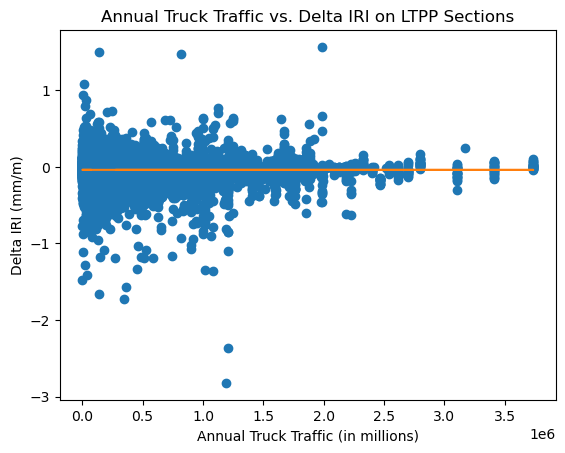

In [45]:
# Plotting Annual Truck Traffic vs. Delta IRI and including linear regression line
IRI_TRF_Plot = plt.plot(ANALYSIS_IRI_TRAFFIC['ANNUAL_TRUCK_VOLUME_TREND'],ANALYSIS_IRI_TRAFFIC['DELTA_IRI'],'o')
IRI_TRF_Plot = plt.plot(ANALYSIS_IRI_TRAFFIC['ANNUAL_TRUCK_VOLUME_TREND'], IRI_TRF_SLP*ANALYSIS_IRI_TRAFFIC['ANNUAL_TRUCK_VOLUME_TREND']+IRI_TRF_INT)
IRI_TRF_Plot = plt.xlabel('Annual Truck Traffic (in millions)')
IRI_TRF_Plot = plt.ylabel('Delta IRI (mm/m)')
IRI_TRF_Plot = plt.title('Annual Truck Traffic vs. Delta IRI on LTPP Sections')
IRI_TRF_Plot

Text(0.5, 1.0, 'Delta Rutting vs. Annual Truck Traffic on LTPP Sections')

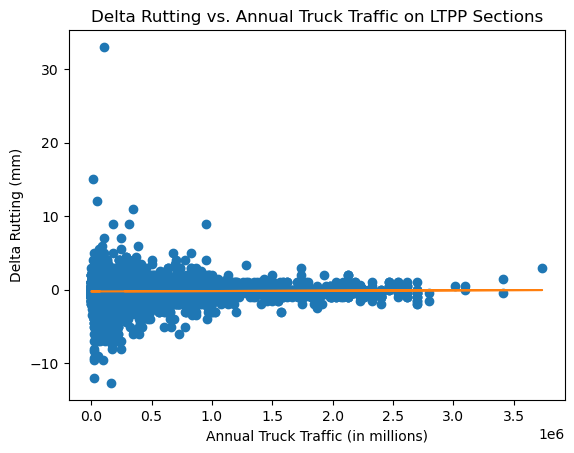

In [46]:
# Plotting Annual Truck Traffic vs. Delta Ruttingnand including linear regression line
RUT_TRF_Plot = plt.plot(ANALYSIS_RUTTING_TRAFFIC['ANNUAL_TRUCK_VOLUME_TREND'],ANALYSIS_RUTTING_TRAFFIC['DELTA_RUT'],'o')
RUT_TRF_Plot = plt.plot(ANALYSIS_IRI_TRAFFIC['ANNUAL_TRUCK_VOLUME_TREND'], RUT_TRF_SLP*ANALYSIS_IRI_TRAFFIC['ANNUAL_TRUCK_VOLUME_TREND']+RUT_TRF_INT)
RUT_TRF_Plot = plt.xlabel('Annual Truck Traffic (in millions)')
RUT_TRF_Plot = plt.ylabel('Delta Rutting (mm)')
RUT_TRF_Plot = plt.title('Delta Rutting vs. Annual Truck Traffic on LTPP Sections')
RUT_TRF_Plot

In order to compare the linear regression slopes from IRI and Rutting (because they are in different units), we will divide them by their respective average values. The result is that we obtain a "Scaled Slope" that is representative of the percent change in IRI/Rutting per unit of traffic (one truck) with respect to the average IRI/rutting. While this is not perfect, it bridges the rift caused by the units of the two metrics not being the same.

In [48]:
AVERAGE_RUTTING = ANALYSIS_RUTTING['MAX_MEAN_DEPTH_1_8'].mean()
SCALED_RUT_TRF_SLOPE = RUT_TRF_SLP/AVERAGE_RUTTING
AVERAGE_IRI = ANALYSIS_IRI['MRI'].mean()
SCALED_IRI_TRF_SLOPE = IRI_TRF_SLP/AVERAGE_IRI
print('Scaled IRI Slope: ' + SCALED_IRI_TRF_SLOPE.astype(str) +', Scaled Rutting Slope: ' + SCALED_RUT_TRF_SLOPE.astype(str))

Scaled IRI Slope: -1.9138191629914504e-10, Scaled Rutting Slope: 9.696479081953469e-09


#### Hypthesis 1 Conclusion
Ultimately, traffic has a very minor effect on both the IRI and Rutting of a section. This is apparent by looking at the two above graphs and the equations of fit for Traffic vs. IRI/Rutting. While the scaled slope (indicative of a percent change in pavement condition per Truck) for Rutting is higher than the scaled slop for IRI, both slopes for the equations of fit are very close to zero, even when they are normalized by scaling them by the average IRI/Rutting (i.e. very small percent changes). From this evidence, we cannot conclude that traffic has a larger effect on the rutting deterioration rate than the IRI deterioration rate.

## Analysis Function Creation
Most of the analyses in this project will be done similary, just swapping out some variables (traffic vs. precipitation and concrete vs. asphalt). Therefore, it is more efficient to create a function that does the analysis.

In the function:
- table: Data frame with pavement condition data (IRI or Rutting) (DataFrame)
- join_table: Data frame with either traffic or temperature data (DataFrame)
- x: pavement condition delta variable name (string)
- y: independent variable variable name (string)
- include_CN: If the join table has CONSTRUCITON_NO as a key field, it should be True, otherwise False (boolean)

The function returns both the joined tables and the linear model parameters

In [51]:
def pavement_analysis(table, join_table, x, y, include_CN = False):
    # If construction_no is included as a key field
    if(include_CN):
        # merge the join table by key fields and remove NAs
        table2 = table.merge(join_table, how = 'left', on = ['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO','YEAR']).dropna()
    else:
        # merge the join table by key fields and remove NAs
        table2 = table.merge(join_table, how = 'left', on = ['STATE_CODE', 'SHRP_ID','YEAR']).dropna()
    # Get values for linear regression (slope and intercept)
    fit_slope, fit_int = np.polyfit(table2[y],table2[x] , 1)
    # Put coefficients in a list
    model_params = [fit_slope, fit_int]
    # Return joined table and model coefficients
    return table2, model_params

## Hypothesis 2
My second hypothesis is that the deterioration rate of IRI will be higher than the deterioration rate of rutting when there is high precipitation.

First we need to join the precipitation to the LTPP section reference table in order to get the same key fields

The averaged tables created in the previous hypothesis will be useable and fed into the pavement_analysis function created above.

In [53]:
# Join annual precipitation table to the section reference table
LTPP_Annual_Precip = Annual_Precip.merge(LTPP_Sec_Ref, how = "left", on = 'MERRA_ID')[['STATE_CODE','SHRP_ID','YEAR','PRECIPITATION']]
# Convert year column to string for later joining
LTPP_Annual_Precip['YEAR'] = LTPP_Annual_Precip['YEAR'].astype(str)

In [54]:
# use pavement_analysis function to get joined table and model coefficients
ANALYSIS_IRI_PRECIP, IRI_PRECIP_COEFFS = pavement_analysis(ANALYSIS_IRI_DELTA, LTPP_Annual_Precip, 'DELTA_IRI', 'PRECIPITATION')
ANALYSIS_IRI_PRECIP

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,YEAR,MRI,LAG_IRI,LAG_YEAR,DELTA_YEAR,DELTA_IRI,PRECIPITATION
0,1,0101,1,1995,0.65720,0.68120,1996,1.0,-0.02400,1258.24
1,1,0101,1,1996,0.68120,0.69480,1997,1.0,-0.01360,1201.48
2,1,0101,1,1997,0.69480,0.73825,1998,1.0,-0.04345,1475.31
3,1,0101,1,1998,0.73825,0.71360,1999,1.0,0.02465,1396.67
4,1,0101,1,1999,0.71360,0.74300,2001,2.0,-0.01470,1145.22
...,...,...,...,...,...,...,...,...,...,...
20928,90,B351,2,1992,1.32260,1.53600,1993,1.0,-0.21340,419.74
20929,90,B351,2,1993,1.53600,1.64460,1994,1.0,-0.10860,609.37
20930,90,B351,2,1994,1.64460,1.92610,1995,1.0,-0.28150,470.59
20931,90,B351,3,1997,2.49520,2.53320,1998,1.0,-0.03800,502.27


In [55]:
# print delta IRI function with respect to precipitation
print("Predicted IRI Delta = " + IRI_PRECIP_COEFFS[0].round(12).astype(str) + '*PRECIP + ' + IRI_PRECIP_COEFFS[1].round(5).astype(str))

Predicted IRI Delta = 1.3009348e-05*PRECIP + -0.05103


In [56]:
# similarly for rutting
ANALYSIS_RUTTING_PRECIP, RUT_PRECIP_COEFFS = pavement_analysis(ANALYSIS_RUTTING_DELTA, LTPP_Annual_Precip, 'DELTA_RUT', 'PRECIPITATION')
ANALYSIS_RUTTING_PRECIP

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,YEAR,MAX_MEAN_DEPTH_1_8,LAG_RUTTING,LAG_YEAR,DELTA_YEAR,DELTA_RUT,PRECIPITATION
0,1,0101,1,1994,4.0,5.0,1996,2.0,-0.50,1845.33
1,1,0101,1,1996,5.0,5.0,1997,1.0,0.00,1201.48
2,1,0101,1,1997,5.0,5.0,1998,1.0,0.00,1475.31
3,1,0101,1,1998,5.0,5.5,2000,2.0,-0.25,1396.67
4,1,0101,1,2000,5.5,6.0,2001,1.0,-0.50,845.24
...,...,...,...,...,...,...,...,...,...,...
12428,90,B310,2,1991,3.0,3.0,1993,2.0,0.00,489.40
12429,90,B320,2,1991,6.0,5.0,1993,2.0,0.50,489.40
12430,90,B330,2,1991,3.0,4.0,1993,2.0,-0.50,489.40
12431,90,B331,3,1991,3.0,4.0,1993,2.0,-0.50,489.40


In [57]:
# Print predicted rutting linear equation with respect to precipitation
print("Predicted Rutting Delta = " + RUT_PRECIP_COEFFS[0].round(12).astype(str) + '*PRECIP + ' + RUT_PRECIP_COEFFS[1].round(5).astype(str))

Predicted Rutting Delta = -2.3607928e-05*PRECIP + -0.19835


Text(0.5, 1.0, 'Delta IRI vs. Annual Precipitation on LTPP Sections')

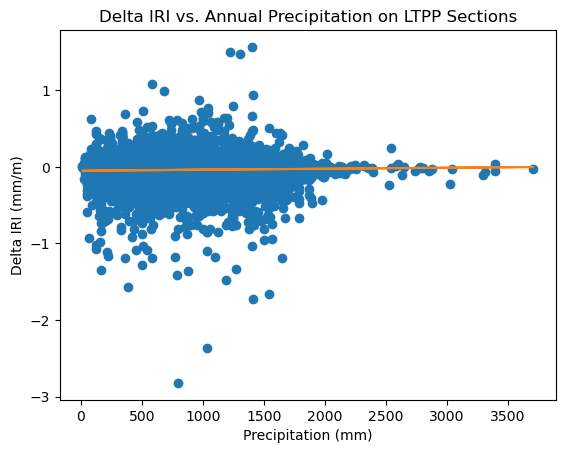

In [58]:
# Plot precipitation vs. delta IRI with linear fit line
IRI_PRECIP_Plot = plt.plot(ANALYSIS_IRI_PRECIP['PRECIPITATION'],ANALYSIS_IRI_PRECIP['DELTA_IRI'],'o')
IRI_PRECIP_Plot = plt.plot(ANALYSIS_IRI_PRECIP['PRECIPITATION'], IRI_PRECIP_COEFFS[0]*ANALYSIS_IRI_PRECIP['PRECIPITATION']+IRI_PRECIP_COEFFS[1])
IRI_PRECIP_Plot = plt.xlabel('Precipitation (mm)')
IRI_PRECIP_Plot = plt.ylabel('Delta IRI (mm/m)')
IRI_PRECIP_Plot = plt.title('Delta IRI vs. Annual Precipitation on LTPP Sections')
IRI_PRECIP_Plot

Text(0.5, 1.0, 'Delta Rutting vs. Annual Precipitation on LTPP Sections')

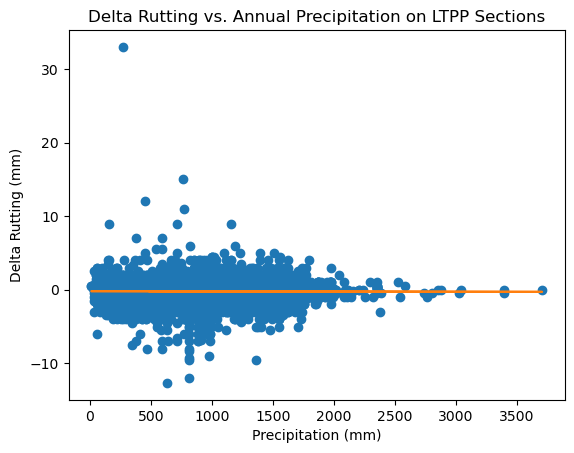

In [59]:
# Plot precipitation vs. delta rutting and linear fit line
RUT_PRECIP_Plot = plt.plot(ANALYSIS_RUTTING_PRECIP['PRECIPITATION'], ANALYSIS_RUTTING_PRECIP['DELTA_RUT'],'o')
RUT_PRECIP_Plot = plt.plot(ANALYSIS_RUTTING_PRECIP['PRECIPITATION'], RUT_PRECIP_COEFFS[0]*ANALYSIS_RUTTING_PRECIP['PRECIPITATION']+RUT_PRECIP_COEFFS[1])
RUT_PRECIP_Plot = plt.xlabel('Precipitation (mm)')
RUT_PRECIP_Plot = plt.ylabel('Delta Rutting (mm)')
RUT_PRECIP_Plot = plt.title('Delta Rutting vs. Annual Precipitation on LTPP Sections')
RUT_PRECIP_Plot

Similar to hypothesis 1, we will scale the slopes so they can be prepared. We already took the average of the Rutting and IRI so that step is not repeated.

In [61]:
SCALED_RUT_PRECIP_SLOPE = RUT_PRECIP_COEFFS[0]/AVERAGE_RUTTING
SCALED_IRI_PRECIP_SLOPE = IRI_PRECIP_COEFFS[0]/AVERAGE_IRI
print('Scaled IRI Slope: ' + SCALED_IRI_PRECIP_SLOPE.astype(str) +', Scaled Rutting Slope: ' + SCALED_RUT_PRECIP_SLOPE.astype(str))

Scaled IRI Slope: 9.175797499755876e-06, Scaled Rutting Slope: -4.496340476830468e-06


#### Hypothesis 2 Conclusion
Similar to traffic, it is hard to see a difference in the slops when looking at the charts. However, when looking at the scaled slopes, it can be seen that IRI increases as more precipitation while rutting decreases on average with more precipitation. While it is not intuitive that pavement condition does not decrease when there is increased precipitation, it can most likely be explained by the face that there is typically less traffic when there is more precipitation. Compared to the traffic analysis, the scale of the scaled slopes is over 2 orders of magnitude larger. Because of this, paired with the fact that the IRI slope is positive, while the Rutting slope is negative, we have evidence that precipitation affects IRI moreso than it does rutting. It should be noted that there are many othe rfactors that go into what causes pavement condition to change including construction events, age of the pavement, material makeup of the pavement, average temperature of the area, and the inspector taking the measurements on the pavement. Because of this, any conclusions should be taken with a grain of salt, nonetheless, this analysis speaks towards the hypothesis that preciptation has a larger negative effect on the IRI of a pavement than on the rutting. 